# Goal 

Code to handle imbalance.   
Need to substitute your data variables.

Lets look into our output variable a little bit. 

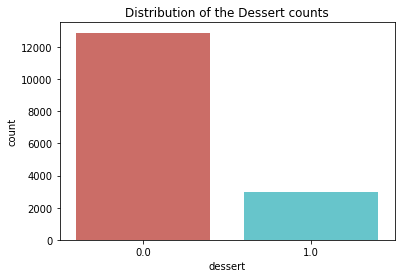

In [210]:
y = recipes_fil.dessert

sns.countplot(x = y, palette='hls')

plt.title("Distribution of the Dessert counts")
plt.show()

### Handling class Imbalance. 

What we're trying to do in this topic is create a 1:1 ratio of the two types of target classes.  We do this so that our model can detect either class with equal power. If we don't balance our target variable our model will be trained to detect one one target class (guess which one) better than the other. In some cases this is what you may need as well. It all depends on what you want your model to do. 
  
  
#### <font color=RED>NOTE:</font> 
Always do the balancing AFTER the test train split, because in our test data (which the model never sees) the distribution of the target classes should be as REAL as possible. This will be the true test of how good our model performs and we should <font color=red>test</font> the model on an unaugmented, imbalanced _test_ dataset. 
  
  
  
Here lets try 2 commonly used techniques 
* Undersampling -- reduces the number of training instances of the majority target class seen in the data 
* Oversampling -- increases the number of training instances of the minority target class seen in the data

#### Undersampling

In [223]:
# Lets shuffle the data before creating the subsamples
train_X = train_X.sample(frac=1, random_state=0)

# number of instances which are desserts in the training dataset
is_dessert = train_X['dessert'].astype(int) == 1
isnot_dessert = train_X['dessert'].astype(int) == 0


desserts_df = train_X[is_dessert]
non_desert_df = train_X[isnot_dessert]

#Lets pick up the same number of records from the majority class
non_desert_df_un = non_desert_df.iloc[:len(train_X[is_dessert])]

# amount of minority class 
print("Count of minority class is : ", len(train_X[is_dessert]))

#amount of majority class 
print("Count of majority undersamples class is : ", len(non_desert_df_un))

Count of minority class is :  2087
Count of majority undersamples class is :  2087


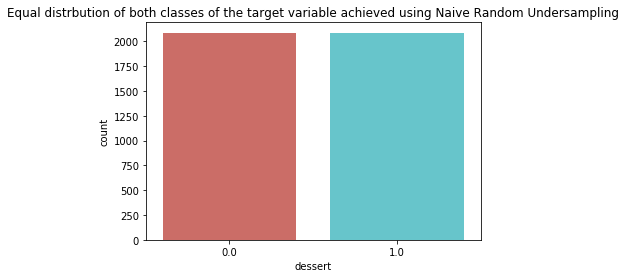

In [224]:
#generating a balanced input dataset
co_df = pd.concat([desserts_df, non_desert_df_un], axis=0)

# Shuffle dataframe rows _un for undersampling
ba_recipes_df_un = co_df.sample(frac= 1, random_state = 0)

#lets confirm 
sns.countplot(x = ba_recipes_df_un.dessert, palette='hls')
plt.title('Equal distrbution of both classes of the target variable achieved using Naive Random Undersampling')
plt.show()

The distribution now looks more even compared to earlier. Remember this dataset, we'll use it again while comparing models generated from different kinds of datasets (imbalanced, balanced using oversampling, balanced using undersampling etc...).  
  

**One problem** with the random undersampling is that we are underutilizing the potential of the dataset. We are throwing away all those extra instances of the majority class which could have helped train the model. So there is **'information loss'**. When we have a VERY large dataset, this is more acceptable.

#### Oversampling
We will go over two (more in the future) commonly used kinds of oversampling :
* Random Oversampling 
* Synthetic Minority Oversampling Technique (SMOTE)

##### Random Oversampling 
This is the most naive strategy where we create new samples by simply using copies of existing samples, i.e. sampling using *replacement* of the current available minority class. The sample should match the number of instances of the majority class, so that the latter doesn't take over during training. 

In [225]:
from imblearn.over_sampling import RandomOverSampler

In [226]:
r_osampler = RandomOverSampler(random_state = 0, sampling_strategy='minority')
X_over , y_over = r_osampler.fit_resample(train_X, train_y)

In [227]:
X_over = pd.DataFrame(X_over, columns = train_X.columns)
X_over.head()
# Looking good. 

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,Grilled Corn and Shrimp Salad,4.375,298,15,14,450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spiced Pear and Raisin Pie,3.75,246,2,1,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Beets with Stout and Sauteed Beet Greens,4.375,176,12,7,1353,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"""Virgin Mary"" Aspic",0,180,5,11,479,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wilted Red Cabbage and Bell Pepper Slaw,3.75,193,2,11,461,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


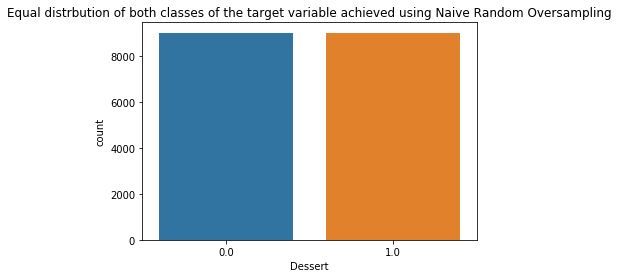

In [228]:
sns.countplot(x = pd.Series(y_over))
plt.title('Equal distrbution of both classes of the target variable achieved using Naive Random Oversampling')
plt.xlabel('Dessert')
plt.show()

Neat, the oversampling increased the sampling of our minority class!!  
However, remember that resampling with replacement will invariably lead to some duplicates. So our model is being trained on the many identical instances.  This may work, but when the test data has instances that are similar and not identical, will it perform that well? 
  
This is why we will now look into SMOTE as another technique for over sampling. 

#### SMOTE
What this technique does is create synthetic a.k.a. fake data samples following a particular distribution which is inherent in the data. So it generates simialr but not identical fake samples. And it leverages the data to create these fake instances. 

In [229]:
from imblearn.over_sampling import SMOTE

# Look at SmoteNC when using continous and nominal data. 
# Right now we're looking at calories alone, which is a continuous variable, so lets stick with SMOTE. 

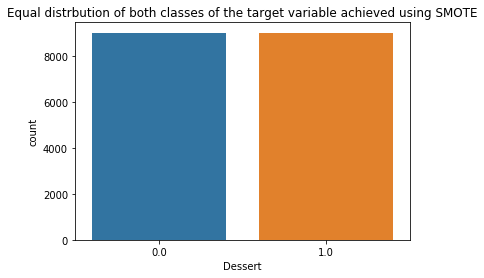

In [230]:
num_train_X = train_X.drop(['title'], axis = 1)

#SMOTE
sm_sampler = SMOTE(random_state=0, sampling_strategy='minority')
X_sm, y_sm = sm_sampler.fit_resample(num_train_X, train_y)
X_sm = pd.DataFrame(X_sm, columns=num_train_X.columns)


#PLOT to see sampling output
sns.countplot(x = pd.Series(y_sm))
plt.title('Equal distrbution of both classes of the target variable achieved using SMOTE')
plt.xlabel('Dessert')

plt.show()